In [1]:
import seawater.eos80 as sw
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

# Get the piston positions as functions of T,S,P 

The net buoyancy of a float is given by its density relative to water.  For neutral buoyancy the float and water have the same density $\rho_f(T,P,\delta V_p)=\rho_w(S,T,P)$, where $\delta V_p$ is the amount of volume displaced by the piston from its ballast point.  We get the RHS from the equation of state of seawater.  The left hand side is calculated as $\rho_f = m/V$ where $m$ is the mass of the float and $V$ is its volume.  Now the mass and volume are relative to a ballast point set by the triplet $(S_b,T_b,P_b)$, where the float is neutrally buoyant, so $\rho_b = \rho_w(S_b,T_b,P_b)$.  So how can $\rho_f$ be different?  Note that if we know the ballasted mass of the float in air $m_0$, then we know the volume of the float at the ballast point: $V_0 = m_0/\rho_b$.


 1. If we are at the ballast point, then the only difference is $\delta_m/V_0$.  To be neutral at the ballast point we would need to have the piston displaced: 
  $$\frac{\delta_m}{V_0}+\frac{m_0}{V_0+\delta_V} = \frac{m_0}{V_0}$$

In [2]:
# This is the function from John Dunlap, except optional argument mass
def pistonneutral (P,T,S,Pbp,Tbp,Sbp,PCbp,addwt,alpha,beta,mass = 27900.0
):
    import seawater.eos80 as sw
    # mass is air weight  (g)
    print(mass)
    # new piston scale factor from Dana July 2004
    pccpc  = 252.0 / (227.0 - 9.0)

    # density of seawater and float are equal at ballast point
    rhobp = sw.dens(Sbp,Tbp,Pbp) / 1000.0

    # volume (cc) of float and seawater at ballast point
    vbp = mass / rhobp
    
    rho = sw.dens(S,T,P) / 1000.0
    print(rho)
    # volume (cc) of seawater of float's mass ref'd to ballast point
    vw = mass / rho - vbp

    # volume (cc) of float ref'd to ballast point
    # with piston at ballast point
    vfp = -alpha * mass * (P - Pbp)
    vft = mass * beta * (T - Tbp)
    vf = vfp + vft

    # volume (cc) of piston to be neutral
    vpn = vw - vf

    # adjust piston volume for added weight in water
    vpn = vpn + addwt/rho

    # piston counts to be neutral
    pcn = vpn / pccpc + PCbp

    return pcn


## Argo Data

All the argo data was downlaoded from http://www.usgodae.org/cgi-bin/argo_select.pl using 54.5 to 58.5N and -52 to -50 E. It gets put into a bunch of netcdf files. 

In [1]:
def plotArgo(ax):
    import netCDF4 as netcdf
    import glob as glob
    d = glob.glob('../../ARGOBravo/*/*/profiles/*')
    for dd in d:
        nc=netcdf.Dataset(dd)
        ax.plot(nc['PSAL'][:][0],nc['TEMP'][:][0],'y.',markersize=1.)
    return nc

<IPython.core.display.Javascript object>


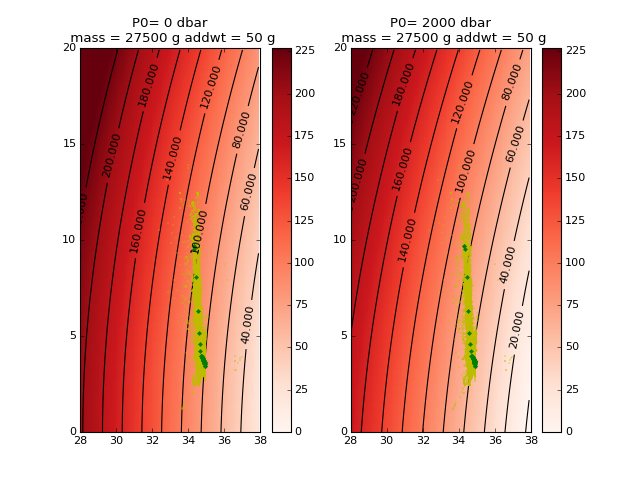

27500
[[ 1.022459    1.02245579  1.02245243 ...,  1.01950713  1.01948207
   1.01945692]
 [ 1.02253961  1.02253637  1.02253297 ...,  1.01958319  1.01955811
   1.01953295]
 [ 1.02262023  1.02261695  1.02261352 ...,  1.01965926  1.01963416
   1.01960898]
 ..., 
 [ 1.03028752  1.0302812   1.03027474 ...,  1.02690286  1.02687629
   1.02684964]
 [ 1.03036834  1.03036199  1.0303555  ...,  1.02697931  1.02695272
   1.02692606]
 [ 1.03044917  1.03044278  1.03043626 ...,  1.02705576  1.02702916
   1.02700247]]
27500
[[ 1.03189842  1.03188935  1.03188016 ...,  1.02815511  1.02812749
   1.02809979]
 [ 1.03197734  1.03196824  1.03195902 ...,  1.02823003  1.0282024
   1.02817468]
 [ 1.03205626  1.03204713  1.03203788 ...,  1.02830496  1.02827731
   1.02824958]
 ..., 
 [ 1.03956614  1.03955436  1.03954247 ...,  1.03544182  1.03541286
   1.03538382]
 [ 1.03964534  1.03963353  1.03962161 ...,  1.03551716  1.03548818
   1.03545914]
 [ 1.03972455  1.03971271  1.03970076 ...,  1.0355925   1.03556351
   1.

In [16]:
# get parameters for our floats:
Tbp = 1.8
Sbp = 34.6
Pbp = 2000.
PCbp = 16
addwt = 50.
alpha = 3.8e-6
beta  = 32.0e-6 # from default.
mass = 27500
t = np.arange(0.,20.,0.1)
s = np.arange(28.,38.,0.1)
T,S = np.meshgrid(t,s)
fig,axs=plt.subplots(1,2)
dat = np.fromfile('./hydrographicdata/Labsea_pts_201007until201507.txt',sep=" ")
dat = np.reshape(dat,(60,3))
for ind,P0 in enumerate([0.,2000.]):
    ax = axs[ind]
    pn = pistonneutral(P0+0.*T,T,S,2000,Tbp,Sbp,PCbp,addwt,alpha,beta,mass=mass)
    pcm=ax.pcolormesh(s,t,pn.T,vmin=0.,vmax=227.,cmap='Reds')
    cs=ax.contour(s,t,pn.T,np.arange(0.,228,20.),colors='k')
    # pn = pistonneutral(P0+0.*T,T,S,2000,Tbp,Sbp,PCbp,addwt,alpha,beta,mass=27900)
    # cs=ax.contour(s,t,pn.T,np.arange(0.,228,20.),colors='k')
    ax.clabel(cs)
    plotArgo(ax)
    fig.colorbar(pcm,ax=ax)
    ax.set_title('P0= %1.0f dbar\n mass = %1.0f g addwt = %1.0f g'%(P0,mass,addwt))
    ax.plot(dat[:,2],dat[:,1],'g.')
    ax.set_xlim([28.,38.])
    ax.set_ylim([0.,20.])

(180,)
[[    0.        9.706    34.31 ]
 [    2.5       9.706    34.31 ]
 [   10.        9.516    34.33 ]
 [   20.        8.054    34.44 ]
 [   30.        6.277    34.52 ]
 [   40.        5.182    34.58 ]
 [   50.        4.569    34.64 ]
 [   60.        4.209    34.68 ]
 [   70.        3.941    34.69 ]
 [   80.        3.97     34.73 ]
 [   90.        3.935    34.75 ]
 [  100.        3.908    34.77 ]
 [  110.        3.874    34.78 ]
 [  120.        3.858    34.79 ]
 [  130.        3.84     34.8  ]
 [  140.        3.819    34.81 ]
 [  150.        3.815    34.81 ]
 [  160.        3.809    34.82 ]
 [  170.        3.791    34.82 ]
 [  182.5       3.78     34.82 ]
 [  200.        3.769    34.83 ]
 [  220.        3.767    34.83 ]
 [  240.        3.76     34.84 ]
 [  260.        3.743    34.84 ]
 [  280.        3.73     34.84 ]
 [  300.        3.725    34.84 ]
 [  320.        3.714    34.84 ]
 [  340.        3.711    34.85 ]
 [  360.        3.7      34.85 ]
 [  380.        3.697    34.85 ]
 [ 

In [104]:
import seawater as allsw
2*np.pi/allsw.f(56.5)

51665.022492184697